Dataset shape: (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


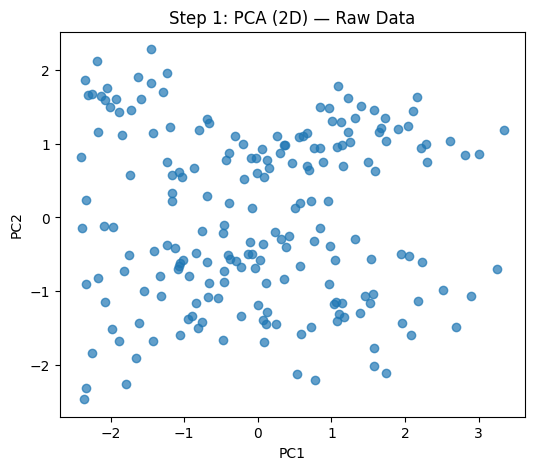

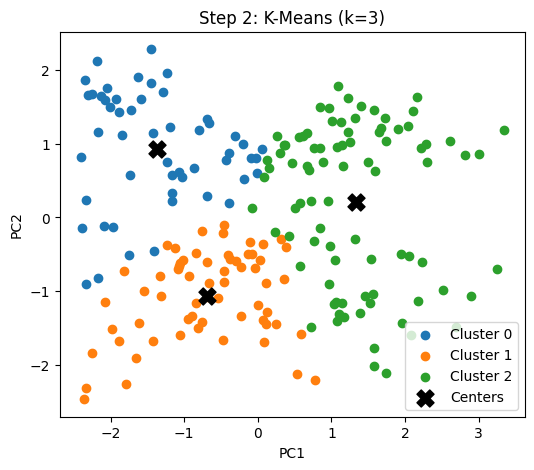

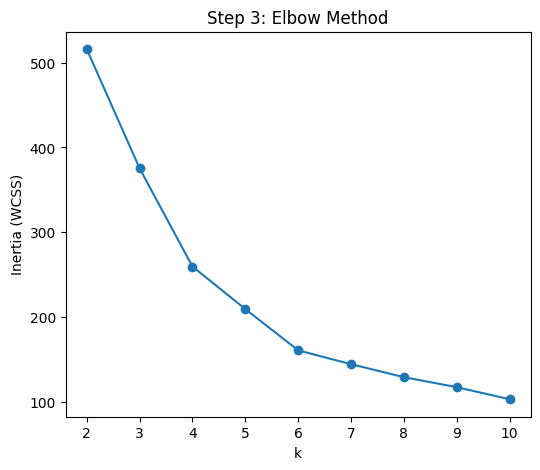

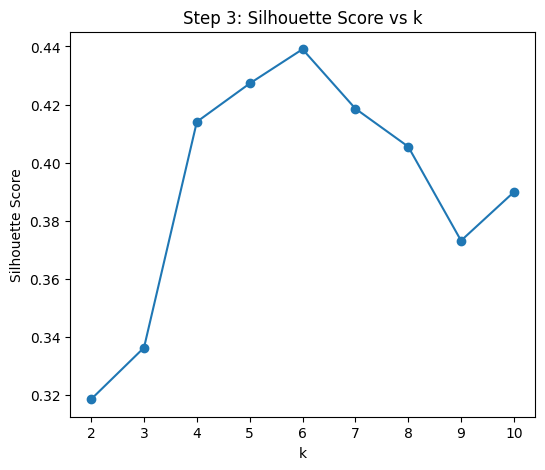

Best k by Silhouette Score: 6


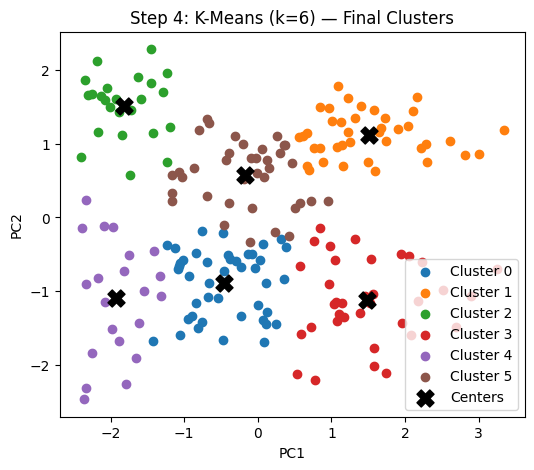

Step 5: Silhouette Score for k=6: 0.4390


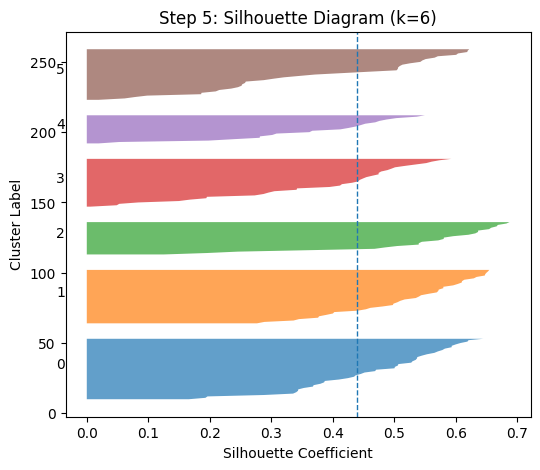

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Step 1: Load and visualize dataset (PCA 2D)

csv_path = "/content/Mall_Customers.csv"  # <-- Change this to your dataset path
df = pd.read_csv(csv_path)

# Optionally, pick numeric features manually (uncomment below to select specific ones)
# df = df[["Annual Income (k$)", "Spending Score (1-100)"]]

print("Dataset shape:", df.shape)
display(df.head())

df_numeric = df.select_dtypes(include=[np.number])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

# PCA to 2D
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Plot Step 1
plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.7)
plt.title("Step 1: PCA (2D) — Raw Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# Step 2: Fit K-Means (initial k) and assign labels
init_k = 3
kmeans_init = KMeans(n_clusters=init_k, n_init=10, random_state=42)
labels_init = kmeans_init.fit_predict(X_scaled)
centers_pca_init = pca.transform(kmeans_init.cluster_centers_)

plt.figure(figsize=(6,5))
for k in np.unique(labels_init):
    plt.scatter(X_pca[labels_init==k,0], X_pca[labels_init==k,1], label=f"Cluster {k}")
plt.scatter(centers_pca_init[:,0], centers_pca_init[:,1], marker="X", s=150, c="black", label="Centers")
plt.title(f"Step 2: K-Means (k={init_k})")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

# Step 3: Use the Elbow Method to find optimal number k
ks = range(2, 11)
inertias = []
sil_scores = []

for k in ks:
    km = KMeans(n_clusters=k, n_init=10, random_state=42).fit(X_scaled)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, km.labels_))

# Elbow plot
plt.figure(figsize=(6,5))
plt.plot(ks, inertias, marker="o")
plt.title("Step 3: Elbow Method")
plt.xlabel("k")
plt.ylabel("Inertia (WCSS)")
plt.show()

# Silhouette vs k plot
plt.figure(figsize=(6,5))
plt.plot(ks, sil_scores, marker="o")
plt.title("Step 3: Silhouette Score vs k")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.show()

best_k = ks[int(np.argmax(sil_scores))]
print(f"Best k by Silhouette Score: {best_k}")

# Step 4: Visualize clusters with color-coding (best k found)
kmeans_best = KMeans(n_clusters=best_k, n_init=10, random_state=42)
labels_best = kmeans_best.fit_predict(X_scaled)
centers_pca_best = pca.transform(kmeans_best.cluster_centers_)

plt.figure(figsize=(6,5))
for k in np.unique(labels_best):
    plt.scatter(X_pca[labels_best==k,0], X_pca[labels_best==k,1], label=f"Cluster {k}")
plt.scatter(centers_pca_best[:,0], centers_pca_best[:,1], marker="X", s=150, c="black", label="Centers")
plt.title(f"Step 4: K-Means (k={best_k}) — Final Clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

# Step 5: Evaluate using Silhouette Score (best k)
final_sil = silhouette_score(X_scaled, labels_best)
print(f"Step 5: Silhouette Score for k={best_k}: {final_sil:.4f}")

# Silhouette diagram
sil_vals = silhouette_samples(X_scaled, labels_best)
y_lower = 10
plt.figure(figsize=(6,5))
for k in np.unique(labels_best):
    kth_sil_vals = sil_vals[labels_best == k]
    kth_sil_vals.sort()
    size_k = kth_sil_vals.shape[0]
    y_upper = y_lower + size_k
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, kth_sil_vals, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_k, str(k))
    y_lower = y_upper + 10
plt.axvline(np.mean(sil_vals), linestyle="--", linewidth=1)
plt.title(f"Step 5: Silhouette Diagram (k={best_k})")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster Label")
plt.show()